In [1]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
import copy
%load_ext autoreload
%autoreload 2

In [2]:
star = eleanor.Source(tic=120362128, sector=14, tc=True)

In [3]:
data = eleanor.TargetData(star, height=15, width=15, do_pca=True, do_psf=False)

In [4]:
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400

In [16]:
data_m = copy.deepcopy(data)
data_z = copy.deepcopy(data)
data.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, xc=[4.9, 4.5, 4.7], 
                        yc=[3.0, 4.4, 7.0], ignore_pixels=1)
#data_m.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
#                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, model='moffat', xc=[4.9, 4.5, 4.7],
#                        yc=[3.0, 4.4, 7.0], ignore_pixels=1)

0%|          | 0/900 [00:10<?, ?it/s]
[0.7111576305460636, -0.10903415555892332, 0.8001011633406889, 61.110899485784174]
mean eval start
mean eval done
mean eval start
mean eval done


ValueError: setting an array element with a sequence.

In [ ]:
data_z.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, model='zernike', xc=[4.9, 4.5, 4.7], yc=[3.0, 4.4, 7.0], ignore_pixels=1)

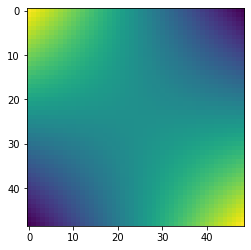

In [76]:
s = 49
zern = eleanor.models.Zernike((s,s),0,0)
x, y = zern.x - np.median(zern.x), zern.y - np.median(zern.y)
plt.imshow(zern.zernike(3).eval(session=sess) * (x ** 2 + y ** 2 < (s//2) ** 2))

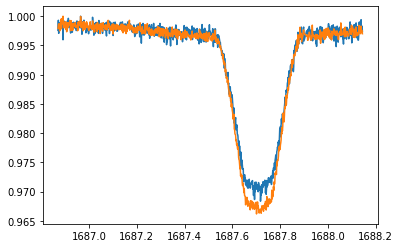

In [7]:
time = sc.time[sq][start:end]
photometry_flux = sc.to_lightcurve().flux[sq][start:end]
plt.plot(time, photometry_flux / np.max(photometry_flux), label='aperture photometry')
psf_flux = np.sum(data.all_psf, axis=1)
plt.plot(time, psf_flux[:end-start] / np.max(psf_flux[:end-start]))

In [9]:
data.psf_a

array([0.71115763, 0.70857519, 0.69946822, 0.70959404, 0.71041714,
       0.70803549, 0.708491  , 0.70891461, 0.70801067, 0.70385746,
       0.71031749, 0.71002643, 0.69804728, 0.70293673, 0.70473183,
       0.68523554, 0.70617827, 0.70855355, 0.71073508, 0.70446197,
       0.70950092, 0.70226163, 0.70722845, 0.71051982, 0.70444432,
       0.70858002, 0.70962806, 0.70982461, 0.70929728, 0.7088738 ,
       0.70714203, 0.70944186, 0.70874488, 0.70781174, 0.71087457,
       0.70665285, 0.70606415, 0.70493948, 0.70860707, 0.70440782,
       0.70728442, 0.70797081, 0.709408  , 0.70782204, 0.71150692,
       0.71005315, 0.71087134, 0.70520582, 0.71048525, 0.70854547,
       0.70941308, 0.71029136, 0.70101423, 0.7069839 , 0.7090325 ,
       0.70982847, 0.70763936, 0.70849861, 0.70768604, 0.70856042,
       0.70598553, 0.70903247, 0.70528347, 0.70475479, 0.70626357,
       0.70707326, 0.70707663, 0.70709892, 0.70775976, 0.70823553,
       0.71017532, 0.70170277, 0.70847725, 0.71001905, 0.70748

In [26]:
print(lk.estimate_cdpp(photometry_flux, transit_duration=1))
print(lk.estimate_cdpp(psf_flux, transit_duration=1))

766.824152995914
0.0
